In [167]:
import numpy as np
import matplotlib.pyplot as plt

# Select random points and plot thier frequency
* select using a normal distribution
* np will return x values. The likely hood of being a selected x value is given the pdf

(array([  8.,  26., 119., 300., 443., 533., 353., 158.,  45.,  15.]),
 array([-3.44473154, -2.77821931, -2.11170707, -1.44519484, -0.77868261,
        -0.11217038,  0.55434185,  1.22085408,  1.88736632,  2.55387855,
         3.22039078]),
 <BarContainer object of 10 artists>)

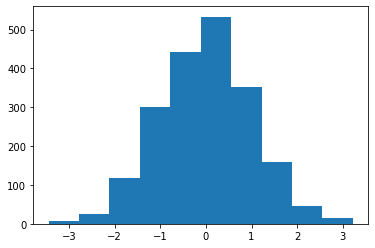

In [168]:
n = 2000
# values = np.random.beta(2,2, n)
# values  = np.random.binomial(3,0.5, n)
values = np.random.standard_normal(n)

plt.hist(values)

# Expectation
* expection is the $$E =  g(x)*f(x)$$
    * where $g$ is probability_of_x_being_selcted
* So, lets define a simple function $y = f(x) =  x^2$
* Use the normal guassian distribution as our pdf

In [169]:
def my_function(x):
    return x**2

Numerically we can try to evalute the expectation

In [170]:
# values  = np.random.binomial(3,0.5, n)
values = np.random.standard_normal(n)
np_expection = np.mean( my_function(values))
np_expection

1.0414910852494665

What is the expectation for the $abs$ function

In [171]:
values = np.random.standard_normal(n)
np.mean(np.abs(values))

0.8027248331757303

What is the expectation when $f(x) = x$
* since x can be negative
* and since the guassin is symmetric
* the expectation should be 0 since I have the same positive and negative values of x at the same probability

In [172]:
np.mean(values)

-0.04566769072913799

# Can we prove any of those?
* this helped me a lot to think through what expectation means 

In [173]:
# values

In [174]:
from sympy import *
from sympy import sqrt, exp
from sympy.functions import Abs
from sympy.plotting import plot, plot3d, plot_implicit

## generate a guassian distribution function

In [175]:
x = symbols('x')

In [176]:
def normal_sym(x,mu,sigma):
    """mu = mean, sigma = std"""
    a = -1/2*((x-mu)/sigma)**2
    return 1/(sigma*sqrt(2*np.pi))*exp(a)

In [177]:
y = normal_sym(x,0,1)

In [178]:
y

0.398942280401433*exp(-0.5*x**2)

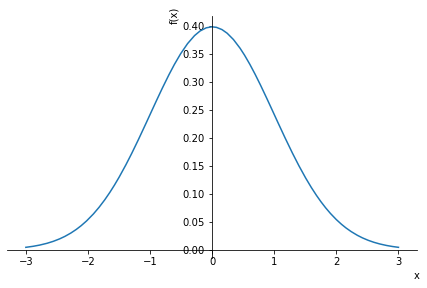

In [179]:
plot(y, (x, -3,3))

Now lets evalute the expectation when $f(x) = x $

In [180]:
N( integrate(x*y, (x,-oo,oo) ))

0

So we get zero which is good, since that is similar to what we got before numerically. 
* The expectation of a symmetric pdf around 0 when the $f(x)=x$ is the identity function will be 0. .
* case
    * if x is the number of points above an opponent in a game. 
    * if you have a normal distribution of points above the opponent
    * if you bet money perportional to the likelhood of a particular x (i.g. a scalar * the identity function)
    * then you will not lose or gain money. 
    * Your expectation is 0

## next case
* Expectation when $f(x) = abs(x)$


In [181]:
N( integrate(Abs(x)*y, (x,-oo,oo) ))

0.797884560802865

* whic his similar to our numeric expection

# next case
* when $f(x) = x^2$
* we can plot the combined expectation expression
* then integrate to get our answer. 

In [182]:
y2 = (y)*(x**2) # probabilty of an x multiplied by the value at the x (which is x**2)
y2

0.398942280401433*x**2*exp(-0.5*x**2)

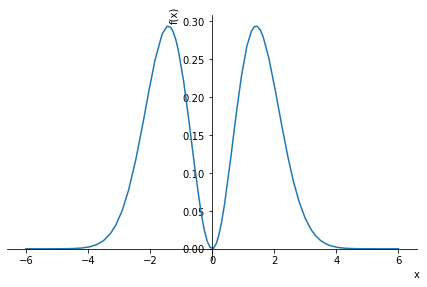

In [183]:
plot(y2, (x, -6,6))

In [184]:
y3 = integrate(y2, (x,-oo,oo) )

In [185]:
N(y3)

1.00000000000000

In [186]:
np.log(-1)

C:\Users\garla\AppData\Local\Temp/ipykernel_17836/153577755.py:1: RuntimeWarning: invalid value encountered in log
  np.log(-1)


nan